In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Numerical Methods for Ordinary Differential Equations

## Assignment: Solving an Initial Value Problem

**Objective:** Write a program to numerically solve a given Initial Value Problem (IVP) using various one-step methods, and perform a convergence analysis by comparing the numerical results to the exact solution.

---

### **Exercise**

Consider the initial value problem (IVP)
$$u'=\frac{u^2+u}{t},\quad 1\leq t\leq 5,\quad u(1)=-2,$$
whose exact solution is $u(t)=\frac{2t}{1-2t}$.

**Part A: Implementation**

Write a program (using a language like Python, MATLAB, or C++) to solve this IVP using the numerical methods listed below. Note that for the **Backward Euler method**, you will need to solve a quadratic equation for $U^{n+1}$ at each time step.

1.  **Forward Euler method (FE):**
    $$U^{n+1}=U^{n} + k f(U^n,t_n).$$
2.  **Backward Euler method (BE):**
    $$U^{n+1}=U^{n} + k f(U^{n+1},t_{n+1}).$$
    *(Hint: This is an implicit method; rearrange it into a quadratic equation $AU^2 + BU + C = 0$ for $U^{n+1}$ and use the quadratic formula.)*
3.  **Explicit midpoint RK2:**
    \begin{align*} k_1 &= f(U^n, t_n) \\ k_2 &= f\left(U^n + \frac{k}{2} k_1, t_n + \frac{k}{2}\right) \\ U^{n+1} &= U^n + k k_2 \end{align*}
4.  **Explicit trapezoidal RK2 (Improved Euler):**
    \begin{align*} k_1 &= f(U^n, t_n) \\ k_2 &= f(U^n + k k_1, t_n + k) \\ U^{n+1} &= U^n + \frac{k}{2} (k_1 + k_2) \end{align*}
5.  **Heun's method (RK3):**
    \begin{align*} k_1 &= f(U^n, t_n) \\ k_2 &= f\left(U^n + \frac{k}{3} k_1, t_n + \frac{k}{3}\right) \\ k_3 &= f\left(U^n + \frac{2k}{3} k_2, t_n + \frac{2k}{3}\right) \\ U^{n+1} &= U^n + \frac{k}{4} (k_1 + 3k_3) \end{align*}
6.  **Standard RK4:**
    \begin{align*} k_1 &= f(U^n, t_n) \\ k_2 &= f\left(U^n + \frac{k}{2} k_1, t_n + \frac{k}{2}\right) \\ k_3 &= f\left(U^n + \frac{k}{2} k_2, t_n + \frac{k}{2}\right) \\ k_4 &= f(U^n + k k_3, t_n + k) \\ U^{n+1} &= U^n + \frac{k}{6} (k_1 + 2k_2 + 2k_3 + k_4) \end{align*}


In [ ]:
def one_step_method_solver(f, k, u0, t0, tf, method):
    """
    Function to implement differents one-step methods and solve the ODE u' = f(u,t).

    Parameters
    f: callable
        Function that defines the ODE.
    k: float
        Time step.
    u0: float
        Initial condition.
    t0: float
        Initial time.
    tf: float
        Final time.
    method: str

    """
    N = int((tf-t0)/k)
    U = np.zeros(N+1)
    U[0]=u0
    T = np.linspace(t0, tf, N+1)

    def FE_method(f, k):
        for n in range(0, N):
            U[n+1] = U[n] + k*f(U[n], T[n])      
        return U, T
    
    def BE_method(k):  
        for n in range(N):
            a = k / T[n+1]
            U[n+1] = (1 - a - np.sqrt((1 - a)**2 - 4*a*U[n])) / (2*a)   # negative root for continuity
        return U, T
    
    def RK2_midpoint(f, k):
        for n in range(0, N):
            k1 = f(U[n], T[n])
            k2 = f(U[n] + k*k1/2, T[n] + k/2)
            U[n+1] = U[n] + k*k2
        return U, T
    
    def RK2_trapezoidal(f, k):
        for n in range(0, N):
            k1 = f(U[n], T[n])
            k2 = f(U[n]+k*k1, T[n] + k)
            U[n+1] = U[n] + k/2 * (k1+k2)
        return U, T
    
    def RK3(f, k):
        for n in range(0, N):
            k1 = f(U[n], T[n])
            k2 = f(U[n] + k*k1/3, T[n] + k/3)
            k3 = f(U[n] + 2*k*k2/3, T[n] + 2*k/3)   
            U[n+1] = U[n] + k/4 * (k1 + 3*k3)     
        return U, T
    
    def RK4(f, k):
        for n in range(0, N):
            k1 = f(U[n], T[n])
            k2 = f(U[n] + k*k1/2, T[n] + k/2)
            k3 = f(U[n] + k*k2/2, T[n] + k/2)
            k4 = f(U[n] + k*k3, T[n] + k)
            U[n+1] = U[n] + k/6 * (k1 + 2*k2 + 2*k3 + k4)
        return U, T
    

    if method=="FE":
        U_sol, T_sol = FE_method(f, k)

    if method=="BE":
        U_sol, T_sol = BE_method(k)

    if method=='Midpoint':
        U_sol, T_sol = RK2_midpoint(f, k)

    if method=="Trapezoidal":
        U_sol, T_sol = RK2_trapezoidal(f, k)

    if method=="RK3":
        U_sol, T_sol = RK3(f, k)

    if method=="RK4":
        U_sol, T_sol = RK4(f, k)
        
    return U_sol, T_sol

In [90]:
F = lambda x, t: (x**2 + x)/t
u,t = one_step_method_solver(F, 0.1, -2, 1, 5, method="BE")

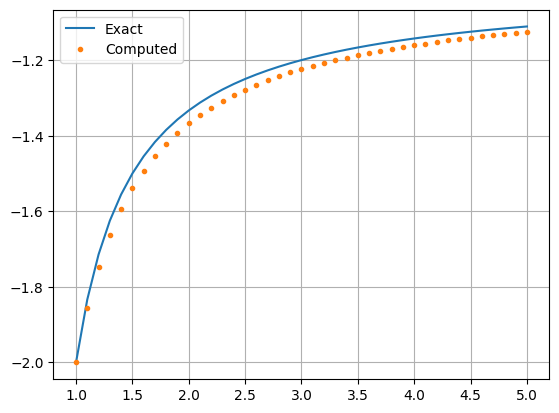

In [91]:
t_points= np.linspace(1, 5, len(y))
f_sol = lambda t: 2*t/(1-2*t)

plt.figure()
plt.plot(t_points, f_sol(t_points), label='Exact')
plt.plot(t, u, '.' ,label='Computed')
plt.plot()
plt.legend()
plt.grid()
plt.show()

---

### **Part B: Convergence Analysis**

Analyze the **convergence** of each method. Compare the numerical solution against the exact solution $u(t)$ at the final time $t=5$ for a sequence of step sizes:
$$k_m = \frac{0.2}{2^m}, \quad \text{for } m=0,1,\dots,6.$$

The exact value at $t=5$ is $u(5) = \frac{2(5)}{1-2(5)} = -\frac{10}{9}$.

**Required Deliverables:**

1.  **Tabular Results:** For each method, present the results in a clear table format, showing $k_m$, the absolute error $\mathcal{E}(k_m) = |U^N(k_m) - u(5)|$, and the **estimated order of convergence** $p$ for consecutive steps.

    | $m$ | $k_m$ | $N$ | FE Error $\mathcal{E}$ | BE Error $\mathcal{E}$ | Midpoint RK2 Error $\mathcal{E}$ | Trapezoidal RK2 Error $\mathcal{E}$ | Heun RK3 Error $\mathcal{E}$ | RK4 Error $\mathcal{E}$ |
    | :-: | :---: | :-: | :---: | :---: | :---: | :---: | :---: | :---: |
    | 0 | 0.2000 | 20 | | | | | | |
    | 1 | 0.1000 | 40 | | | | | | |
    | 2 | 0.0500 | 80 | | | | | | |
    | 3 | 0.0250 | 160 | | | | | | |
    | 4 | 0.0125 | 320 | | | | | | |
    | 5 | 0.0063 | 640 | | | | | | |
    | 6 | 0.0031 | 1280 | | | | | | |
    | **Observed $p$** | | | | | | | | |

In [100]:
f = lambda u,t: (u*u + u)/t
t0, tf, u0 = 1.0, 5.0, -2.0
u_exact_5 = -10.0/9.0

methods = ["FE", "BE", "Midpoint", "Trapezoidal", "RK3", "RK4"]
kms = [0.2/(2**m) for m in range(7)]

rows = []
for m, k in enumerate(kms):
    N = int((tf - t0)/k)
    row = {"m": m, "k_m": k, "N": N}
    for meth in methods:
        U, T = one_step_method_solver(f, k, u0, t0, tf, meth)
        err = abs(U[-1] - u_exact_5)
        row[f"{meth} Error 𝓔"] = err
    rows.append(row)

table = pd.DataFrame(rows)

def observed_p(errs):
    p = [np.nan]
    for i in range(1, len(errs)):
        e_old, e_new = errs[i-1], errs[i]
        p.append(np.log(e_old/e_new)/np.log(2) if e_old>0 and e_new>0 else np.nan)
    return p

for meth in methods:
    table[f"{meth} p"] = observed_p(table[f"{meth} Error 𝓔"].to_numpy())

table


,m,k_m,N,FE Error 𝓔,BE Error 𝓔,Midpoint Error 𝓔,Trapezoidal Error 𝓔,RK3 Error 𝓔,RK4 Error 𝓔,FE p,BE p,Midpoint p,Trapezoidal p,RK3 p,RK4 p
0,0,0.200000,20,0.031373,0.027677,4.957013e-03,1.105883e-03,6.404530e-04,4.867114e-06,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.100000,40,0.014992,0.014144,1.048329e-03,2.891698e-04,6.879651e-05,6.692678e-08,1.065306,0.968436,2.241379,1.935209,3.218686,6.184339
2,2,0.050000,80,0.007367,0.007159,2.404533e-04,7.164031e-05,7.872264e-06,1.616277e-09,1.025018,0.982313,2.124263,2.013074,3.127485,5.371837
3,3,0.025000,160,0.003655,0.003603,5.759537e-05,1.772532e-05,9.388160e-07,2.538914e-10,1.011243,0.990525,2.061732,2.014960,3.067864,2.670391
4,4,0.012500,320,0.001821,0.001808,1.409647e-05,4.403035e-06,1.145520e-07,2.019673e-11,1.005360,0.995078,2.030619,2.009241,3.034840,3.652017
5,5,0.006250,640,0.000909,0.000905,3.487104e-06,1.096935e-06,1.414510e-08,1.389999e-12,1.002620,0.997489,2.015232,2.005020,3.017628,3.860966
6,6,0.003125,1280,0.000454,0.000453,8.671988e-07,2.737392e-07,1.757309e-09,9.126033e-14,1.001296,0.998731,2.007595,2.002605,3.008863,3.928952


2.  **Log-Log Plot:** Generate a single log-log plot showing the absolute error $\mathcal{E}$ versus the step size $k$ for **all six methods**.

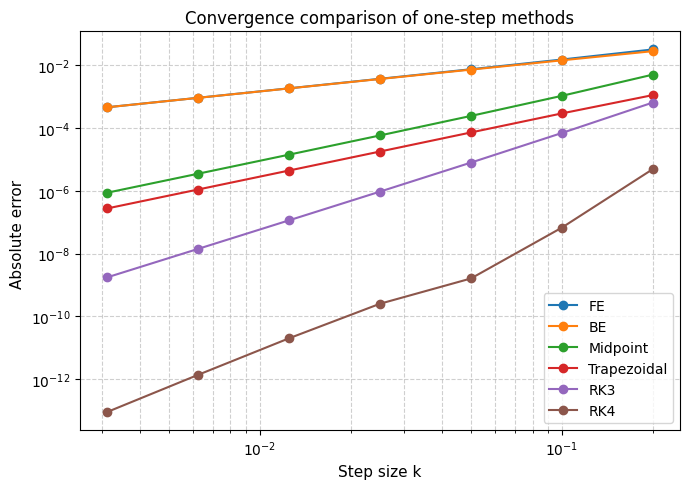

In [98]:
plt.figure(figsize=(7,5))

# Cada método en la misma gráfica
for meth in methods:
    plt.loglog(
        table["k_m"], 
        table[f"{meth} Error 𝓔"], 
        marker="o", 
        label=meth
    )

plt.xlabel("Step size k", fontsize=11)
plt.ylabel("Absolute error ", fontsize=11)
plt.title("Convergence comparison of one-step methods", fontsize=12)
plt.grid(True, which="both", ls="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()